In [62]:
# Importação do grafo
from networkx import nx_agraph
from graphviz import Source

# Carregar o grafo usando NetworkX
graph = nx_agraph.read_dot('./graphs/graph2.dot')

# Converter o grafo para o formato DOT
graph_dot = nx_agraph.to_agraph(graph)

# Imprime na tela
source = Source(graph_dot.to_string())
source.view()  # Abre o visualizador padrão do sistema operacional


'Source.gv.pdf'

## Busca em Largura (BFS)
Usando matriz de adjacência

In [ ]:
# Converte o grafo para matriz de adjacência
from networkx import to_numpy_array
adj_matrix = to_numpy_array(graph)
print(adj_matrix)



[[0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]]


In [76]:
def bfs(adj_matrix, start_node):
    num_nodes = len(adj_matrix)
    visited = [False] * num_nodes
    queue = []
    traversal_order = []

    queue.append(start_node)
    visited[start_node] = True

    while queue:
        current_node = queue.pop(0)
        traversal_order.append(current_node)

        for neighbor, is_connected in enumerate(adj_matrix[current_node]):
            if is_connected and not visited[neighbor]:
                queue.append(neighbor)
                visited[neighbor] = True

    return traversal_order

start_node = min(graph_dot.nodes())

result_tree = bfs(adj_matrix, start_node)
result_tree_dot = nx_agraph.to_agraph(result_tree)
Source(result_tree_dot.to_string())

TypeError: list indices must be integers or slices, not Node

## Busca por profundidade (DFS) 
Usando lista de adjacência

In [73]:
# Converte o grafo para listas de adjacência
from networkx import to_dict_of_lists
adj_list = to_dict_of_lists(graph)
adj_list

{'a': ['b', 'e'],
 'b': ['a', 'c', 'h'],
 'c': ['b', 'd', 'f'],
 'd': ['c', 'e'],
 'e': ['d', 'a'],
 'f': ['c', 'g', 'j'],
 'g': ['f', 'h'],
 'h': ['b', 'g', 'i'],
 'i': ['h', 'j'],
 'j': ['i', 'f']}

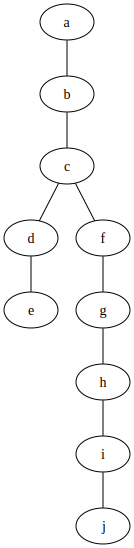

In [74]:
from typing import Dict, List
from networkx import Graph

def dfs(adj_list: Dict[str, List[str]], start_node: str) -> Graph:
    visited = set()
    dfs_tree = Graph()

    def visit(node: str):
        visited.add(node)
        for neighbor in adj_list.get(node, []):
            if neighbor not in visited:
                dfs_tree.add_edge(node, neighbor)
                visit(neighbor)

    visit(start_node)
    return dfs_tree


start_node = min(adj_list.keys())

result_tree = dfs(adj_list, start_node)
result_tree_dot = nx_agraph.to_agraph(result_tree)
Source(result_tree_dot.to_string())